In [2]:
!pip install torch torchvision

In [0]:
import torch

In [119]:
torch.cuda.is_available()  #GPU

True

In [0]:
a = torch.FloatTensor([[2,3,4,5]])

In [121]:
a

tensor([[2., 3., 4., 5.]])

In [0]:
import numpy as np

In [123]:
b = np.array([[3,4,5,6]])
b

array([[3, 4, 5, 6]])

In [124]:
b.reshape(2,2)

array([[3, 4],
       [5, 6]])

In [125]:
a.view(2,-1)

tensor([[2., 3.],
        [4., 5.]])

In [126]:
a.unsqueeze(1).shape

torch.Size([1, 1, 4])

In [127]:
a.shape

torch.Size([1, 4])

In [128]:
torch.cuda.device_count()

1

In [129]:
# GPU 메모리에 올리는 Tensor 생성
x = torch.cuda.FloatTensor([[1,2,3]])
x

tensor([[1., 2., 3.]], device='cuda:0')

In [130]:
device = torch.device('cuda')
y = torch.FloatTensor([2,4,5])
y = y.to(device)
print(y)

tensor([2., 4., 5.], device='cuda:0')


In [131]:
!nvidia-smi

Mon Jul 29 08:26:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    33W /  70W |   2823MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [132]:
a = torch.cuda.FloatTensor(1024,1024,256)
a

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [133]:
!nvidia-smi

Mon Jul 29 08:26:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    33W /  70W |   2823MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Dataset 처리 모듈 제공
## torch.utils.data

In [0]:
linear = torch.nn.Linear(4,1)

In [0]:
#input
x = torch.FloatTensor([0,1,1,1])

In [136]:
linear(x)

tensor([-0.1333], grad_fn=<AddBackward0>)

In [137]:
linear.weight

Parameter containing:
tensor([[-0.2949, -0.4716,  0.1926,  0.0084]], requires_grad=True)

In [0]:
import torch.nn.functional as F

In [139]:
x = torch.FloatTensor([0,-10,-1,-1])
F.softmax(linear(x), dim=0)

tensor([1.], grad_fn=<SoftmaxBackward>)

In [140]:
torch.sigmoid(linear(x))

tensor([0.9905], grad_fn=<SigmoidBackward>)

In [0]:
?torch.sigmoid

# torch.optim
##최적화 알고리즘 클래스 제공

# torchvision.datasets
##Vision 관련 기능 제공

# Model

In [0]:
import torch.nn as nn

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        
        self.input_dim = input_dim
        self.hidden._dim = hidden_dim
        
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        out = F.relu(self.layer1(x))
        out = F.relu(self.layer2(out))
        out = self.layer3(out)
        return out

In [144]:
#Training Model

device = torch.device("cuda")

model = Model(8,128)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=le-3)
criterion = nn.MSELoss()

epochs = 10

model.train()
for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        
        optimizer.zero_grad()
        loss = criterion(predict, batch_y)
        loss.backward()
        optimizer.step()
        
        if i%100 == 0:
            loss = loss.item()
            loss
            print(f"{e}epochs, {i} iters - {loss}")

AttributeError: ignored

In [145]:
# Testing Model

total_loss = []
test_num = 0

with torch.no_grad():
    model.eval()
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predict = model(batch_X)
        predict = predict*(max_ - min_) + min_
        loss = F.ll_loss(predict, batch_y)
        
        batch_size = batch_y.size(0)
        test_num += batch_size
        total_loss.append(loss.item()*batch_size)
        
total_loss = np.sum(total_loss)/test_num
print(f"{e}epochs - {total_loss}")

AttributeError: ignored

In [0]:
# Save, Load

torch.save(the_model.state_dict(), PATH)

the_model = TheModelClass()
the_model.load_state_dict(torch.load(PATH))

# Example: 캘리포니아 집값 예측

In [0]:
from sklearn.datasets import fetch_california_housing

In [0]:
data = fetch_california_housing()

In [148]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [149]:
data.data.shape

(20640, 8)

In [150]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [151]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

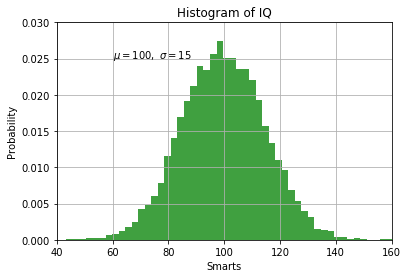

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [0]:
target = data.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [190]:
X_train.shape

(16512, 8)

In [0]:
min_, max_ = y_train.min(), y_train.max()
y_train = (y_train - min_)/(max_ - min_)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [0]:
from torch.utils.data import TensorDataset

In [0]:
X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

X_train, y_train = X_train.float(), y_train.float()
X_test, y_test = X_test.float(), y_test.float()

y_train, y_test = y_train.view(-1, 1), y_test.view(-1, 1)

In [0]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [0]:
from torch.utils.data import DataLoader

In [0]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [0]:
import torch.nn as nn

In [0]:
# model 정의
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):  #필수요소
        super(Model, self).__init__()        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.linear1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.linear2 = nn.Linear(self.hidden_dim, 1)
        
    def forward(self, x):     #필수요소
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
        z2 = self.linear2(a1)
        a2 = torch.sigmoid(z2)
        return a2

In [0]:
# model 정의2 regression
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):  #필수요소
        super(Model, self).__init__()        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.linear1 = nn.Linear(self.input_dim, 1)
#         self.linear2 = nn.Linear(self.hidden_dim, 1)
        
    def forward(self, x):     #필수요소
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
#         z2 = self.linear2(a1)
#         a2 = torch.sigmoid(z2)
        return a1

In [206]:
device = torch.device('cuda')

model = Model(8, 32)
model = model.to(device)

mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
model.train()

for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        loss = mse_loss(predict, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #여기까지가 필수요소
        
        if i % 200 == 0:
            loss = loss.item()
            print(f"{e}, {i} - {loss}")
        

        
# for batch_X, batch_y in train_loader:
#     print(batch_X.shape)
#     print(batch_y.shape)
#     break
    

0, 0 - 0.32576918601989746
0, 200 - 0.1319160759449005
0, 400 - 0.07792456448078156
1, 0 - 0.03879725933074951
1, 200 - 0.041029199957847595
1, 400 - 0.014856668189167976
2, 0 - 0.0139585230499506
2, 200 - 0.032996632158756256
2, 400 - 0.018014129251241684
3, 0 - 0.021745309233665466
3, 200 - 0.03318096697330475
3, 400 - 0.016265936195850372
4, 0 - 0.010275306180119514
4, 200 - 0.015603238716721535
4, 400 - 0.015101500786840916
5, 0 - 0.020184483379125595
5, 200 - 0.015944164246320724
5, 400 - 0.02638695016503334
6, 0 - 0.013713727705180645
6, 200 - 0.010849416255950928
6, 400 - 0.023142822086811066
7, 0 - 0.029634207487106323
7, 200 - 0.008232016116380692
7, 400 - 0.012131580151617527
8, 0 - 0.020818810909986496
8, 200 - 0.018410027027130127
8, 400 - 0.016890183091163635
9, 0 - 0.011833148077130318
9, 200 - 0.033277273178100586
9, 400 - 0.017103321850299835


In [207]:
l1_loss = nn.L1Loss()
test_num = 0
total_loss = []

with torch.no_grad():
    model.eval()
    
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
#         batch_X = (batch_X - std_scaler.mean_)/std_scaler.var_
        predict = model(batch_X)
        
        predict = (max_ - min_)*predict + min_
        loss = l1_loss(predict, batch_y)
        
        loss = loss.item()
        batch_size = batch_X.size(0)
        total_loss.append(loss*batch_size)
        test_num += batch_size
total_loss = np.sum(total_loss)/test_num
print(total_loss)

0.4999968968620596


In [203]:
print(total_loss)

0.4231322583302047


In [208]:
model.linear1.weight

Parameter containing:
tensor([[ 0.1655,  0.0276, -0.0361,  0.0453,  0.0073, -0.8890, -0.2110, -0.1907]],
       device='cuda:0', requires_grad=True)